In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


In [ ]:
!nvidia-smi

Mon Apr  8 03:25:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#tensors
#tensors created using torch.tensor
scalar = torch.tensor(7)
scalar
#scalar has no dimensions
scalar.ndim
scalar.item()

7

In [ ]:
vector = torch.tensor([7,7])
vector.ndim
vector.shape

torch.Size([2])

In [ ]:
Matrix = torch.tensor([[7,8],
                      [9,10]])
Matrix.shape

torch.Size([2, 2])

In [ ]:
Tensor = torch.tensor([[[2,3,4],
                       [4,5,6],
                       [5,7,7]]])
Tensor.shape


torch.Size([1, 3, 3])

In [ ]:

#random tensors - they are important because the way many neural networks work is on random numbers and adjust the numbers to work on that data.
random_tensor = torch.rand(3,4)
random_tensor


tensor([[0.8462, 0.5700, 0.1773, 0.2957],
        [0.8107, 0.7124, 0.9106, 0.1418],
        [0.7637, 0.0732, 0.3579, 0.5812]])

In [ ]:
random_tensor.ndim

2

In [ ]:
#creating a random tensor with the similiar shape to an image tensor
#the size= does not really matter
random_image_size_tensor = torch.rand(size=(224,224,3)) #height width and color channels
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [ ]:
#tensor with all zeroes and ones
zero = torch.zeros(3,4)
#tensor with all ones
ones = torch.ones(3,4)

ones.dtype
random_tensor.dtype

torch.float32

In [ ]:
#creating a range of tensors and tensors like
#using torch.range()
one_to_10 = torch.arange(start=1,end=10, step=1)
one_to_10
#tensor like
ten_zeros = torch.zeros_like(one_to_10)


In [ ]:
#tensor data types
#data type is float 32 tensor as it is default, this is just for the sake of precision
#if you want pytorch to track gradients then requires_grad is useful
float_32_tensor = torch.tensor([3.0,6.0,9.9], dtype=None, device=None, requires_grad=False)
float_32_tensor.dtype

torch.float32

In [ ]:
#tensor data types
#data type is float 32 tensor as it is default, this is just for the sake of precision
#if you want pytorch to track gradients then requires_grad is useful
float_16_tensor = torch.tensor([3.0,6.0,9.9], dtype=None, device=None, requires_grad=False)


In [ ]:
int_32_tensor = torch.tensor([3.0,6.0,9.9], dtype=torch.int32, device=None, requires_grad=False)
int_32_tensor



tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
some_tensor = torch.rand(3,4)
some_tensor
print(f"Data type : {some_tensor.dtype}")
print(f"Data type : {some_tensor.shape}")
print(f"Data type : {some_tensor.device}")




Data type : torch.float32
Data type : torch.Size([3, 4])
Data type : cpu


In [ ]:
#TENSOR OPERATIONS - ADDITION, SUBTRACTION, MULTIPLICATION, DIVISION, MATRIX MULTIPLICATION
#CREATE A TENSOR

tensor = torch.tensor([1,2,3])
tensor + 0

tensor([1, 2, 3])

In [ ]:
#Multiplying it by 10
tensor*10

tensor([10, 20, 30])

In [ ]:
tensor - 10
#pytorch in built functins
torch.mul(tensor, 10)
torch.add(tensor, 10)

tensor([11, 12, 13])

In [ ]:
#two types of multiplication, matrix multiplication and element wise multiplication
#matrix multiplication would be a dot product

print(tensor, "*", tensor)
print(f"Equals : {tensor * tensor}")
#1x3 3x1 = 1x1
print(f"Matrix multiplication : {torch.matmul(tensor, tensor)}")
print(f"Matrix multiplication : {tensor @ tensor}")



tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals : tensor([1, 4, 9])
Matrix multiplication : 14
Matrix multiplication : 14


In [ ]:
#both of them have to be compatible.
tensor1 = torch.rand(2,3)
tensor2 = torch.rand(3,2)
tensor1 @ tensor2

tensor([[0.7943, 1.4220],
        [0.6852, 1.3556]])

In [ ]:
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7,8],
                         [9,10],
                         [11,12]])
tensor_A.shape, tensor_B.shape


(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
#we can manipulate the shape of one of our tensors using transpose.
#.T gives us the transpose of the given matrix
tensor_B.T @ tensor_A

tensor([[ 89, 116],
        [ 98, 128]])

In [ ]:
#Tensor aggregation - Finding the min, max, mean and the sum etc
x = torch.arange(0,100,10)
x
x.dtype
torch.min(x), x.min()

#finding the mean
#torch.mean function requires a tensor of float32
torch.mean(x.type(torch.float32))

x.type(torch.float32).mean()

tensor(45.)

In [ ]:
#finding the sum
x.type(torch.float32).sum()

#finding the positional mix and min

#at tensor x index we get the minimum or the least value and then returns the index position of the target tensor
x.argmin()
#the max function gives us the position
x.argmax()
#getting the max value in the tensor
x[x.argmax()]

tensor(90)

In [ ]:
#reshaping, stacking, squeezing and unsqueezing
#reshaping - reshapes the input tensor to a defined shape
#view  - returns a view of an input tensor of certain shape
#stacking - combines multiple tensors on top of each other (vtack or side by side hstack)
#squeeze -  removes all '1 dimensions from a tensor
#unsqueeze - adds a '1' dimension to a target tensor
#permute - return a view of the input with dimensions permuted

#creating a tensor

import torch
x = torch.arange(1.,10.)
x, x.shape

#add an extra dimension
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape


(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
#change the view
z = x.view(1,9)
z, z.shape
x

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
#chagnging z will change x
z[:, 0] = 5
x

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
#stacking tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
#squeezing and unsqueezing the tensors
#squeeze removes all the single dimensions from a target tensor

x_reshaped, x_reshaped.shape
x_reshaped.squeeze().shape

#torch unsqueezed adds a single dimension to a target tensor at a specific dim
print(f"Squeezed version: {x_reshaped.squeeze()}")
print(f"UnSqueezed version: {x_reshaped.unsqueeze(dim=1)} with shape: {x_reshaped.unsqueeze(dim=1).shape}")

Squeezed version: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
UnSqueezed version: tensor([[[5., 2., 3., 4., 5., 6., 7., 8., 9.]]]) with shape: torch.Size([1, 1, 9])


In [ ]:
#torch.permute rearranges the dimensions of a target tensor in a specified order

x_original = torch.rand(size=(224,224,3)) #end has the color channels
#Permute the original tensor to rearrange the axis or dimension
x_permute = x_original.permute(2,0,1)
print(f"Previous shape: {x_original.shape}")
print(f"Previous shape: {x_permute.shape}")

Previous shape: torch.Size([224, 224, 3])
Previous shape: torch.Size([3, 224, 224])


In [ ]:
##indexing  - selecting data from tensors using indexing
#similar to numpy
#creating a tensor

import torch
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
#Accessing the 1 in the tensor above
x[0][0][0]

tensor(1)

In [ ]:
#returns the second value in the main matrix
x[0][1]

tensor([4, 5, 6])

In [ ]:
#x[1] does not work because it only has one dimension in the torch.size[1,3,3] above
x[1][0][0]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
#get all the values of 0th and the 1st dimension but only index one of the second dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
x[0, :, :]
x[0,0,:]
# the colon or : basically means all the above, all the values of the remaining tensor


tensor([1, 2, 3])

In [ ]:
#Pytorch tensors and numpy
#torch.from_numpy converts numpy to pytorch tensor
#torch.Tensor.numpy() from tensor to numpy

import numpy as np

array = np.arange(1.0,8.0)
#numpy is in float64 while tensor is in float32
tensor = torch.from_numpy(array)
array, tensor


(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
#changing the value of the array does not change the value of the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
#Tensor to Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
numpy_tensor, tensor

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 tensor([1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
#same thing as above, they do not share the same memory location
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
#Pytorch reproducibility  - trying to take the random out of the random
#how a neural network learns - 1) random numbers, 2) tensor operations, 3) update the random numbers and make them better representatio of the data 4) keep doing it again and again

In [ ]:
torch.rand(3,3)

tensor([[0.9656, 0.2152, 0.8505],
        [0.2067, 0.9311, 0.5118],
        [0.6368, 0.4223, 0.0476]])

In [ ]:
#to reduce the randomness in neural networks and pytorch comes in the concept of random seed
#random seed flavours the randomness

#creating two tensors

random_tensorA = torch.rand(3,4)
random_tensorB = torch.rand(3,4)
print(random_tensorA)
print(random_tensorB)
print(random_tensorA == random_tensorB)

tensor([[0.1416, 0.4059, 0.2420, 0.7730],
        [0.0177, 0.3665, 0.7969, 0.3285],
        [0.0360, 0.3245, 0.4508, 0.3187]])
tensor([[0.7128, 0.4371, 0.5833, 0.2440],
        [0.8041, 0.6183, 0.4944, 0.6102],
        [0.4431, 0.4460, 0.0765, 0.6705]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
#Random seed

#setting the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)

random_tensor_D = torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [ ]:
#running tensors and pytorch objects on GPU'S for faster computation on numbers
!nvidia-smi
#checking if pytorch is accessing the gpu
torch.cuda.is_available()

Mon Apr  8 03:25:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

True

In [ ]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
#putting tensors on the gpu

#Create a tensor  - default on the CPU
tensor = torch.tensor([1,2,3])

#tensor not on GPU
print(tensor, tensor.device)


tensor([1, 2, 3]) cpu


In [ ]:
#moving the tensor to the GPU  - if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [ ]:
#moving the tensor back to the cpu
#to fix the gpu tensor with numpy, we will have to change it to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
#PYTORCH WORKFLOW MODULE - PART 2

In [ ]:
#WHAT WILL BE COVERED -
#DATA - PREPARING AND LOADING
#Building the model
#fitting the model into the data
#making predictions (inference)
#saving and loading the model
#putting it together


In [ ]:
import torch
from torch import nn #contains all the pytorch's building blocks for pytroch
import matplotlib.pyplot as plt
torch.__version__

#1) Data preparing and loading
#using linear regression formula with known parameters

weight = 0.7
bias = 0.3

start = 0
end= 1
step=0.02
#adding an extra dimension
X = torch.arange(start, end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
###Splitting data into training and testing sets - one of the most important concepts
#the goal for this is generalization

#we tune the model on the validation set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=None):
  #plots the training data, test data and compares the predictions
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #plot the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})






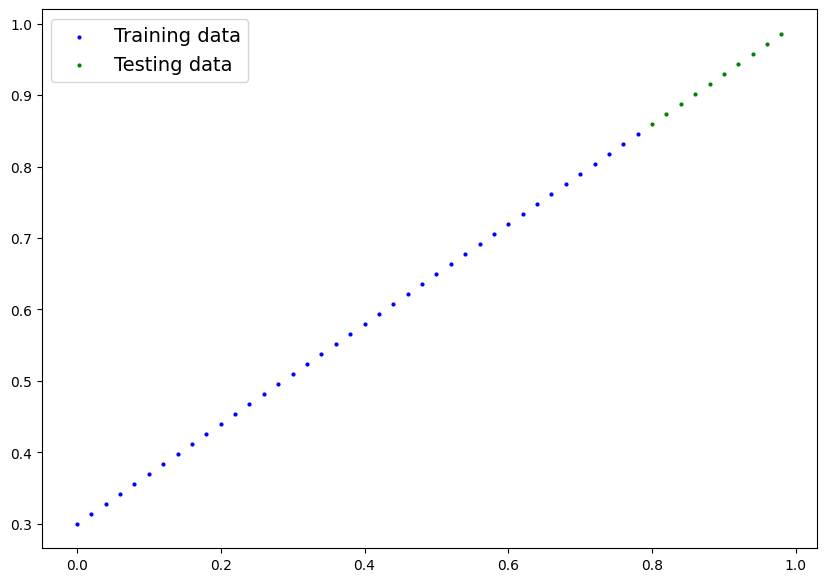

In [ ]:
plot_predictions()

In [ ]:
##Building a model
#first pytorch model.

#What our model does:
#start with random values, 2) Look at training data
#adjust the random values to better represent the ideal values(weights and bias)
#two main algorithms to learn - gradient descent and backpropogation.
from torch import nn

#We are going to create a linear regression model.
#creating a linear regression model class

#nn.Module - almost everything in pytorch inherits from nn.Module. Base class for all neural networks
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #forward method to define computation in the model. This is needed for
    #any of the nn modules (neural network modules)
  def forward(self, x:torch.Tensor)-> torch.Tensor:
      return self.weights*x + self.bias #the linear regression formula








In [ ]:
#Pytorch model building essentials
# 1) torch.nn - contains all the building blocks for computational graphs
# 2) torch.nn.Parameter - what parameters our modules should learn
# 3) torch.nn.Module - base class for all neural network modules, always overwrite forward method
# 4) torch.optim - optimizers in pytorch, helps with gradient descent
# 5) def forward() - All nn.Module subclasses requires you to overwrite forward.
# ^defines what happened in forward computation.



In [ ]:
#checking the contents of our pytorch model

#checking what is instead of our model. We can check what is instead our model using .parameters

In [ ]:
#create random seed
import torch
torch.manual_seed(42)
#creating instance of the model - subclass of nn.Module
model_0 = LinearRegressionModel()

#checking our the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#an ideal model will take X_test values as the parameter and predict the y_test values accurately

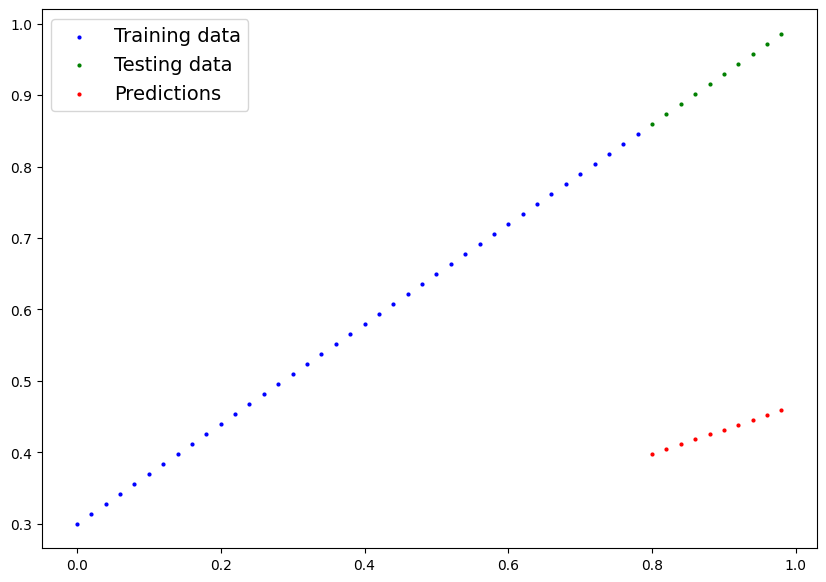

In [ ]:
#Making predictions using the test data
#we will be using torch.inference_model()

#checking how it predicts y_test based on x_test

#making predictions/inference, contains the gradient function
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_test

plot_predictions(predictions=y_preds)


In [ ]:
#Training our first machine learning model
#learning from unknown parameters to known parameters
#poor representation -> good

#WE WILL USE A LOSS FUNCTION ON THIS CASE.

#Loss function is also called COST FUNCTION.

#Loss fn - a fn to measure how wrong the model's predictions are to ideal output.
#Talking about mean absolute error.

#Optimizer - takes into account the loss function and adjusts the values according to the bias

#For pytorch we need a training loop and a testig loop

In [ ]:
#L1Loss is uses the MAE (Mean Absolute Error)
#lr in the SGD is Learning rate, parameter is a value model sets itself
#lr learning rate is a very important hyper parameter(higher the learning rate the bigger the "step" the optimizer will take. )
#setting up a loss function
#For classification problems, whether the photo is a cat or a dog, we use binary classification.
loss_fn = nn.L1Loss()

#setup an optimizer - torch.optim - The most popular one is SGD - Stochastic gradient descent
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)





In [ ]:
#Builing a training loop and a testing loop in pytorch

#Steps -
#0 - Loop through the data
#1 - Forward pass (involves the data moving through the model/layers) forward propogation
#2 - Calculate the loss - compare forward pass predicitons to ground truth labels
#3 - Optimizer zero grad
#4 - (Backpropogation) Loss backward through the network to calculate the gradients of each of the parameters of our model w.r.t the loss
#5 - (Gradient descent) Optimizer step - use the optimizer to adjust our model's parameters and try to improve the loss.
#Gradient is basically the slope

#Learning rate scheduling - start with big steps for gradient descent and then slowly decrease the steps.


In [ ]:
#Epoch is one loop through the data
epochs = 100
epoch_count= []
loss_values = []
test_loss_values = []

#Step 0  - Loop through the data:
for epoch in range(epochs):
  epoch_count.append(epoch)
  #Set the model to training mode
  model_0.train() #train mode sets all parameters that require gradients to require gradients
  # 1 - Forward pass
  y_pred = model_0(X_train)
  # 2- calculating the loss
  loss = loss_fn(y_pred, y_train)
  '''
  print(f"Loss: {loss}")
  '''
  loss_values.append(loss)
  # 3- optimizer zero grad
  optimizer.zero_grad()
  #4 - Perform backpropogation on the loss w.r.t tthe parameters
  loss.backward()
  # 5- Step the optimizer - performs gradient descent
  optimizer.step()

  #Testing code
  model_0.eval() #turns off the different settings not needed in the model for predicitons
  with torch.inference_mode(): #turns of gradient tracking and other things not needed for testing
    #1) forward pass

    test_pred = model_0(X_test)

    #2) Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    #printing out
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Test : {loss} | Test_loss: {test_loss}")





  print(model_0.state_dict())


Epoch: 0 | Test : 0.31288138031959534 | Test_loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Test : 0.1976713240146637 | Test_loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', ten

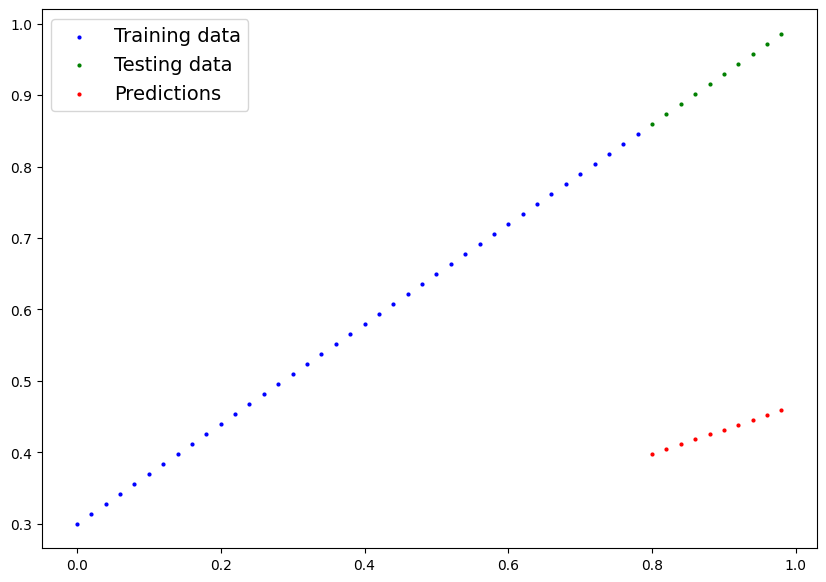

In [ ]:
plot_predictions(predictions=y_preds)

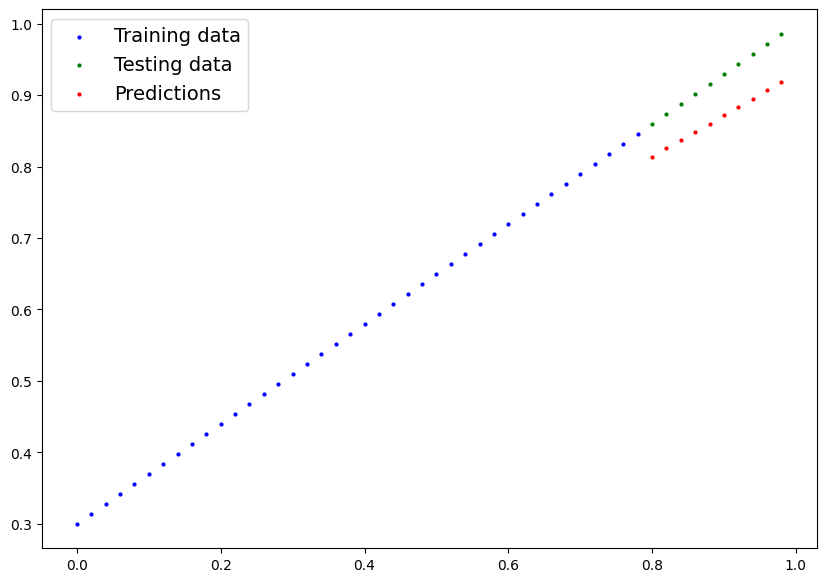

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [ ]:
#Three main methods of saving and loading the pytorch modles
#torch.save - saving a pytorch object
#torch.load() - allows you to load theh saved pytorch object
#torch.nn.Module.load_state_dict() - load the model's saved dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#Saving our pytorch model
from pathlib import Path

#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
#SAVE THE MODEL using state_dict

print(f"Saving the model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models


total 4
-rw-r--r-- 1 root root 1680 Apr  8 03:25 01_pytorch_workflow_model_0.pth


In [ ]:
#Loading a pytorch model

#we will have to create a new instance o our model class and load the saved dict into that

model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#loading in a saved state_dict

loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of the model_0 - with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#Making some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
#comparing the loaded model preds with the orignal model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
#Importing pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [ ]:
#creating device agnostic code - did we get access to GPU OR NOT
#Set up device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
#creating some data using the linear regression model
#y = weight*X +bias
weight = 0.5
bias = 0.2
#Creating range values
start = 0
end=1
step =0.02

#Creating X and Y  - features and labels

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [ ]:
#splitting the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

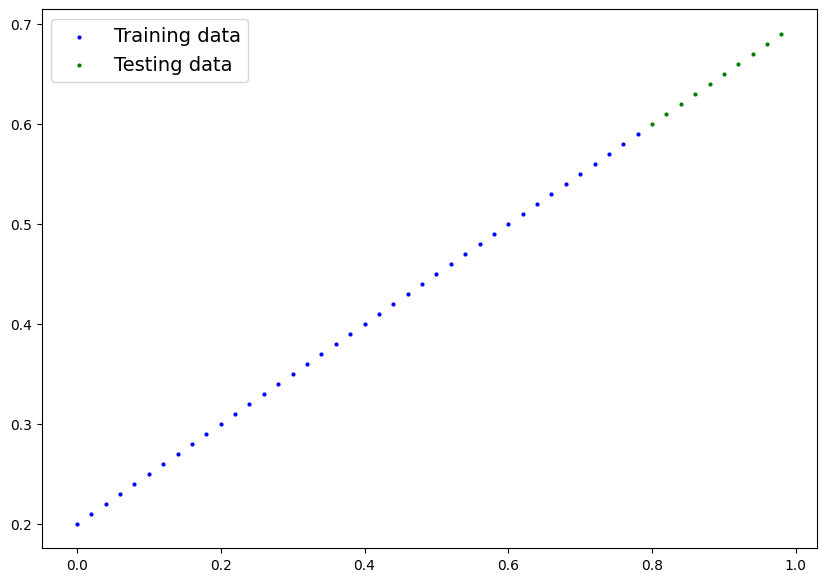

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#Building a pytorch linear model (for linear regression)

 #Create a linear model by sub classing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Using nn.Linear() for creating the model parameters - also called linear transformed, dense layer etc, LINEAR TRANSFORM
    self.linear_layer = nn.Linear(in_features=1, out_features=1)


  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()




(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#set the model to use the target device
#device agnostic code -
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Training code
#For training we need a loss function, optimizer, training loop and a testing loop


#Setting up a loss function
loss_fn = nn.L1Loss()

#Setting up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.2)

torch.manual_seed(42)

epochs = 200
#device agnostic code for your data, data might be on the cpu when the model is on the gpu
#puts the tensors into the gpu for faster computation.
X_train = X_train.to(device)
y_train=y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #Forward pass
  y_pred = model_1(X_train)

  #Calculating the loss
  loss = loss_fn(y_pred, y_train)

  #Optimizer
  optimizer.zero_grad()

  #Backpropogation
  loss.backward()

  #Optimizer step
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 == 0:
    print(f"Epoch : {epoch} Loss : {loss} Test Loss : {test_loss}")





Epoch : 0 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 10 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 20 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 30 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 40 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 50 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 60 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 70 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 80 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 90 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 100 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 110 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 120 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epoch : 130 Loss : 0.041917942464351654 Test Loss : 0.21223273873329163
Epo

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5305]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2300], device='cuda:0'))])

In [ ]:
weight, bias

(0.5, 0.2)

In [ ]:
model_1.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.6544],
        [0.6650],
        [0.6757],
        [0.6863],
        [0.6969],
        [0.7075],
        [0.7181],
        [0.7287],
        [0.7393],
        [0.7499]], device='cuda:0')

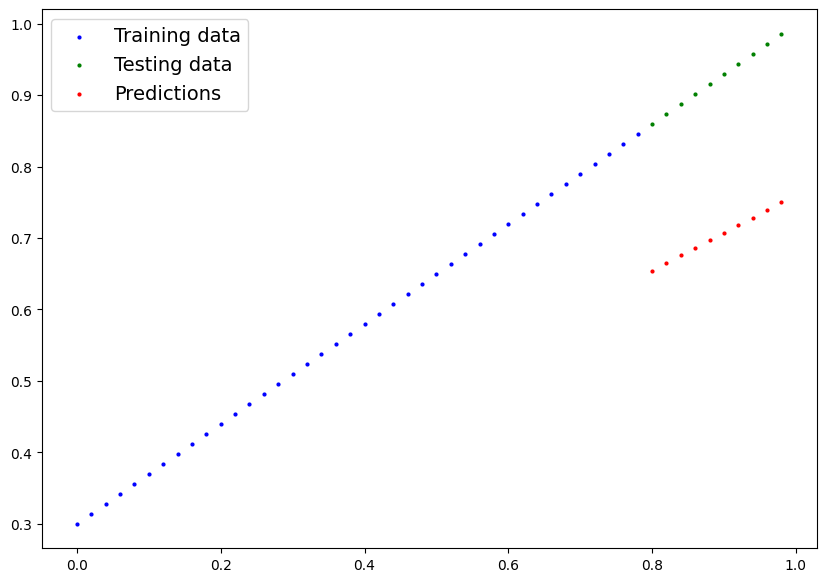

In [ ]:
#Checking out our model predictions visually

plot_predictions(predictions=y_preds.cpu())

In [ ]:
#Saving and loading a trained model.

from pathlib import Path

#Creating a model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_1.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH


PosixPath('models/01_pytorch_workflow_1.pth')

In [ ]:
#Saving the model save dict
print(f"Saving the model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to : models/01_pytorch_workflow_1.pth


In [ ]:
#Loading the pytorch model
#subclasses nn.Module
#Using the pytorch's in build NN layers and then calling them
loaded_model_1 = LinearRegressionModelV2()


#Load the saved model_! state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5305]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2300], device='cuda:0'))])

In [ ]:
#Evaluating the loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')